In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [38]:
df = pd.read_csv("C:/Users/luke/OneDrive/Documents/MPhys Project/Output Files/Testing Offsets/200k_0.2_misal_df.csv", index_col=0)
df

,QOP_FIT,PHI_FIT,THETA_FIT,P_FIT,PZ_FIT,P_TRUTH,Q_TRUTH,PZ_TRUTH,PHI_TRUTH,THETA_TRUTH,...,Z_TRUTH_3,Z_TRUTH_4,Z_TRUTH_5,Z_TRUTH_6,GLOBAL_Z_HIT_1,GLOBAL_Z_HIT_2,GLOBAL_Z_HIT_3,GLOBAL_Z_HIT_4,GLOBAL_Z_HIT_5,GLOBAL_Z_HIT_6
0,-0.000394,0.003379,1.570444,2537.078538,0.894516,2455.192383,-1.0,0.860644,0.003370,1.570446,...,84.908882,81.929268,81.753998,81.578728,85.138145,85.222191,84.867485,81.713760,81.804581,81.866585
1,-0.030187,-0.014826,1.565021,33.126788,0.191304,33.149776,-1.0,0.191329,-0.014826,1.565025,...,-11.061239,-60.128014,-63.014202,-65.900391,-5.511034,-8.478577,-11.000354,-60.188480,-62.988258,-65.804665
2,-0.007110,-0.004913,1.564960,140.645435,0.820881,141.559982,-1.0,0.826991,-0.004897,1.564954,...,320.415771,270.757782,267.836700,264.915619,326.301758,323.375702,320.635071,270.427643,267.872559,264.862335
3,-0.003916,0.004738,1.572947,255.345124,-0.549109,277.003693,-1.0,-0.593702,0.004748,1.572940,...,375.892731,NaN,NaN,NaN,373.651276,374.783966,375.888275,NaN,NaN,NaN
4,-0.000400,0.000943,1.571214,2500.382837,-1.044543,2368.440674,-1.0,-0.991716,0.000936,1.571215,...,-108.175819,-104.616684,-104.407326,-104.197968,-108.541557,-108.284904,-108.275940,-104.745293,-104.312508,-104.205399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,-0.009514,0.002635,1.569416,105.109606,0.145093,104.788315,-1.0,0.145770,0.002608,1.569405,...,497.779297,485.954254,485.258698,484.563171,499.434418,498.439117,497.883392,485.789551,485.067230,484.820282
4751,-0.143407,-0.011892,1.561291,6.973166,0.066285,6.971266,-1.0,0.066291,-0.011882,1.561287,...,-48.644814,-130.127914,-134.883087,-139.638260,-39.014400,-43.858627,-48.635715,-130.416016,-134.781189,-139.656540
4752,-0.000770,0.000954,1.572042,1298.517274,-1.617822,1309.147095,-1.0,-1.648879,0.000953,1.572056,...,-313.379730,-302.673920,-302.044159,-301.414398,-314.484192,-313.905426,-313.164032,-302.768921,-302.148834,-301.429138
4753,-0.002180,-0.002362,1.568523,458.735425,1.042668,456.857971,-1.0,1.042032,-0.002367,1.568515,...,471.952393,452.564941,451.424530,450.284088,474.206696,473.018524,471.934814,452.378326,451.467285,450.425323


In [28]:
from scipy.stats import norm

def Residual_Plot(x, label = "", save = False, bins=100):
    """
    Residual_Plot takes a 1D input of data and plots it as a frequency density histogram, overlaying a fitted normal distribution.

    Inputs
    x: 1D input data, Pandas series or Numpy array
    label: adds labels to the x axis and file name if save is set to true, string
    save: if True will save the plot as label_residual_plot.png, boolean
    bins: number of bins for the histogram, integer

    Returns
    mu: the mean of the fitted normal distribution, float
    std: the standard deviation of the fitted normal distribution, float
    fig: the matplotlib figure containing the final graph, matplotlib figure
    """

    x = x[~np.isnan(x)]

    mu, std = norm.fit(x)

    norm_x = np.arange(start = np.min(x), stop = np.max(x), step = 0.0001)
    norm_y = norm.pdf(norm_x, mu, std)

    fig = plt.figure(figsize = (4, 4), dpi = 200)
    plt.hist(x, bins = bins, density = True)
    plt.plot(norm_x, norm_y)
    
    if label != "":
        plt.xlabel("Residual in " + label)

    plt.ylabel("Frequency Density")
    plt.text(x = -0.5, y = -1.2, s = "Mean : " + str(mu) + " mm" + "\nSigma : " + str(std) + " mm", size = 10)
    plt.show()

    if save == True:
        plt.savfig(label + "_residual_plot.png")

    return mu, std, fig



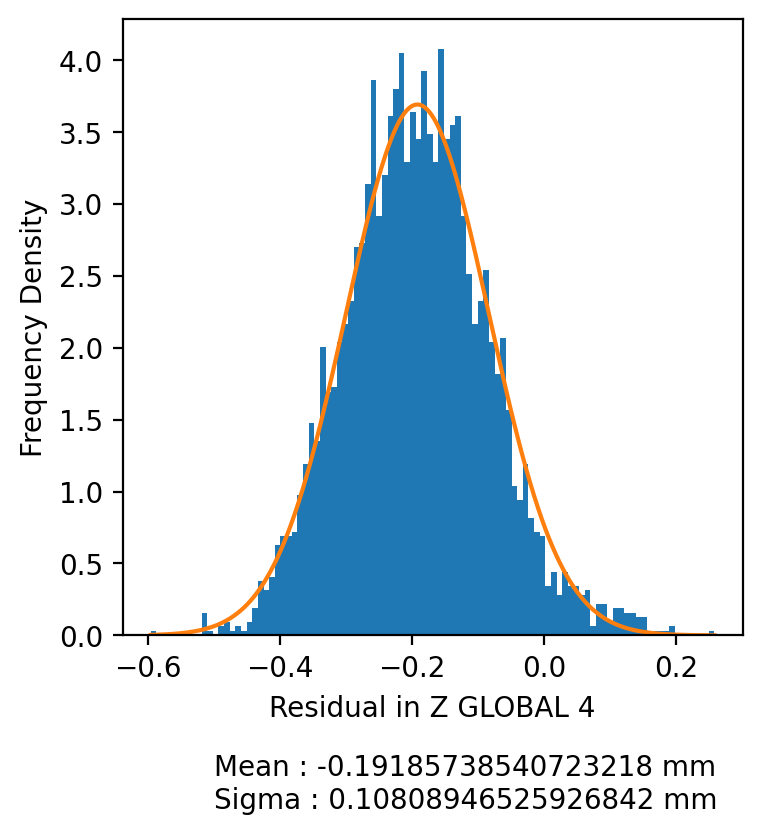

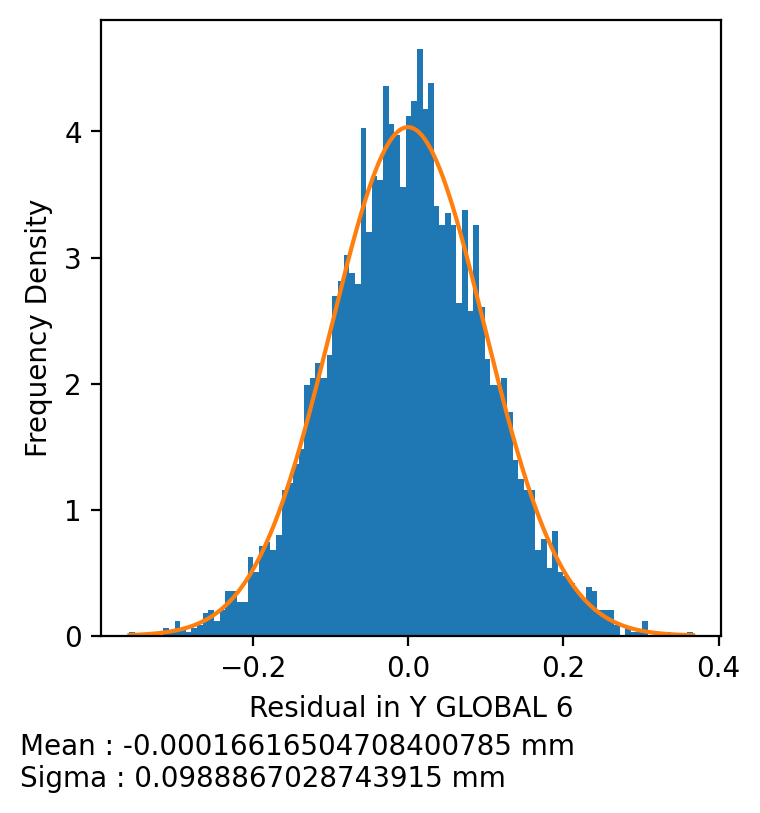

In [43]:
mu, std, fig = Residual_Plot(df["GLOBAL_Z_HIT_4"] - df["Z_TRUTH_4"], label = "Z GLOBAL 4")
mu, std, fig = Residual_Plot(df["LOCAL_Y_HIT_3"] - df["Y_TRUTH_3"], label = "Y GLOBAL 6")